# Assignment 2 
Goal: To findout the person has donated blood in March 2007 or not ? (The given binary varibale shows either 1 indicate for donated in 2007 March or 0 indicate for not donated in 2007 March)

In [1]:
blood_transfusion = 'transfusion.data'

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
transfusion = pd.read_csv(blood_transfusion, sep=',' , decimal = '.' , header=0 , names=['Recency','Frequency','Monetary','Time','Donated Blood'])

In [5]:
transfusion.dtypes

Recency          int64
Frequency        int64
Monetary         int64
Time             int64
Donated Blood    int64
dtype: object

In [6]:
transfusion.head(10)

,Recency,Frequency,Monetary,Time,Donated Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [7]:
transfusion.tail(10)

,Recency,Frequency,Monetary,Time,Donated Blood
738,23,1,250,23,0
739,23,4,1000,52,0
740,23,1,250,23,0
741,23,7,1750,88,0
742,16,3,750,86,0
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [8]:
fake_transfusion= transfusion.copy()

In [9]:
print(fake_transfusion.loc[fake_transfusion['Recency'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [10]:
print(fake_transfusion.loc[fake_transfusion['Frequency'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [11]:
print(fake_transfusion.loc[fake_transfusion['Monetary'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [12]:
print(fake_transfusion.loc[fake_transfusion['Time'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [13]:
print(fake_transfusion.loc[fake_transfusion['Donated Blood'].isnull()])

Empty DataFrame
Columns: [Recency, Frequency, Monetary, Time, Donated Blood]
Index: []


In [14]:
fake_transfusion['Recency'].value_counts()

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
12      6
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: Recency, dtype: int64

In [15]:
fake_transfusion['Donated Blood'].value_counts()

0    570
1    178
Name: Donated Blood, dtype: int64

In [16]:
import matplotlib.pyplot as plt

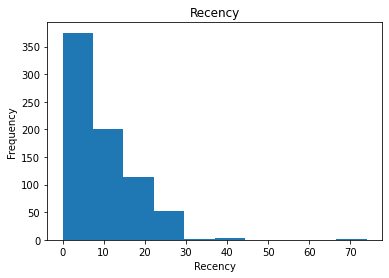

In [17]:
fake_transfusion['Recency'].plot(kind='hist',bins=10)
plt.title('Recency')
plt.xlabel('Recency')
plt.show()

>From the above histogram we can see that some datas are far from the mean distribution

In [18]:
fake_transfusion[['Recency']][fake_transfusion.Recency >= 30]

,Recency
495,35
496,38
497,38
498,40
499,74
746,39
747,72


> we are considering those Recency value more than 30 considered as an outliers and replaced with the mean value 

In [19]:
fake_transfusion['Recency'] = fake_transfusion['Recency'].transform(lambda x: np.where(x > 30, x.mean(), x))

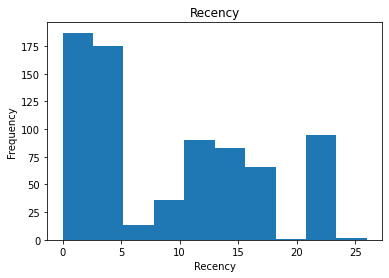

In [20]:
fake_transfusion['Recency'].plot(kind='hist',bins=10)
plt.title('Recency')
plt.xlabel('Recency')
plt.show()

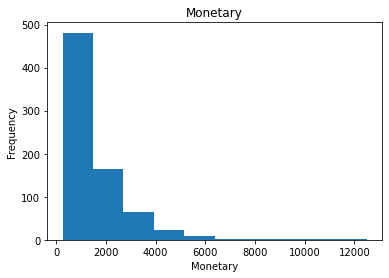

In [21]:
fake_transfusion['Monetary'].plot(kind='hist',bins=10)
plt.title('Monetary')
plt.xlabel('Monetary')
plt.show()

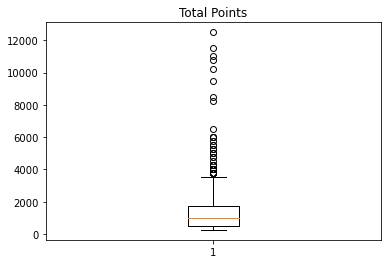

In [22]:
plt.boxplot(fake_transfusion['Monetary'])
plt.title('Total Points')
plt.show()

In [23]:
fake_transfusion[['Monetary']][fake_transfusion.Monetary > 6000]

,Monetary
0,12500
9,11500
341,9500
500,10750
502,8500
503,11000
504,6500
505,10250
517,8250


In [24]:
fake_transfusion['Monetary'] = fake_transfusion['Monetary'].transform(lambda x: np.where(x > 6000, x.mean(), x))

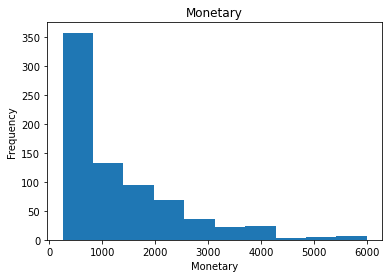

In [25]:
fake_transfusion['Monetary'].plot(kind='hist',bins=10)
plt.title('Monetary')
plt.xlabel('Monetary')
plt.show()

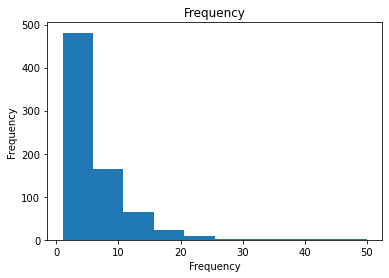

In [26]:
fake_transfusion['Frequency'].plot(kind='hist',bins=10)
plt.title('Frequency')
plt.xlabel('Frequency')
plt.show()

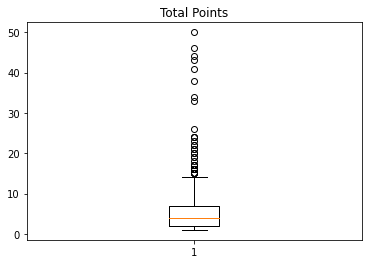

In [27]:
plt.boxplot(fake_transfusion['Frequency'])
plt.title('Total Points')
plt.show()

In [28]:
fake_transfusion['Frequency'] = fake_transfusion['Frequency'].transform(lambda x: np.where(x > 30, x.mean(), x))

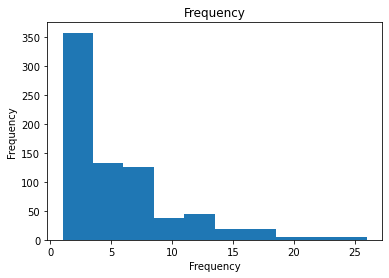

In [29]:
fake_transfusion['Frequency'].plot(kind='hist',bins=10)
plt.title('Frequency')
plt.xlabel('Frequency')
plt.show()

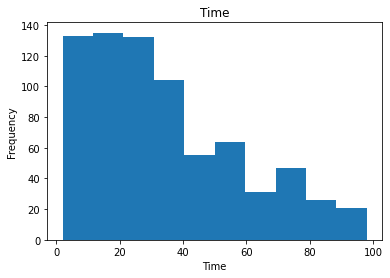

In [30]:
fake_transfusion['Time'].plot(kind='hist',bins=10)
plt.title('Time')
plt.xlabel('Time')
plt.show()

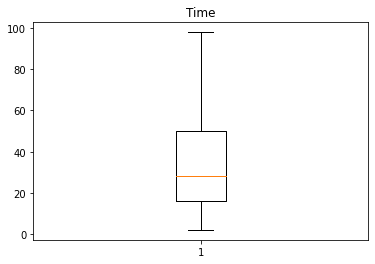

In [31]:
plt.boxplot(fake_transfusion['Time'])
plt.title('Time')
plt.show()

> By plotting two different kind of plot box plot and histogram we can see that there are no outliers, we are assuming that data are well distributed.

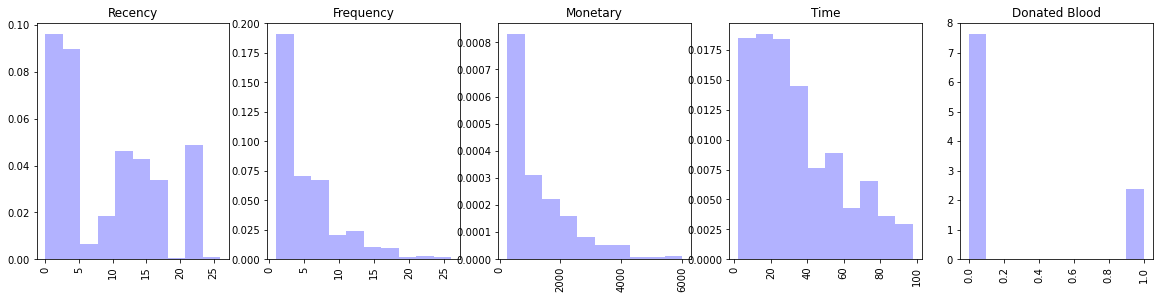

In [32]:
plt.figure(figsize=(20,20))
for i, col in enumerate(fake_transfusion.columns):
    plt.subplot(4,5,i+1)
    plt.hist(fake_transfusion[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

> By plotting histogram of all the attributes we can see that only few people were donated blood in 2007.
> Similarly, we can noticed that Recency, Frequency and Monetary are linearly distributed and high co-related.

# Pie Chart of Donated Blood in 2007 distribution

In [56]:

tt = fake_transfusion.groupby('Donated Blood')
tt.value
#fake_transfusion['Donated Blood'].plot(kind='pie',autopct='%.2f')
#plt.axis('equal')
#plt.show()



# Multiple Relationship Time vs others

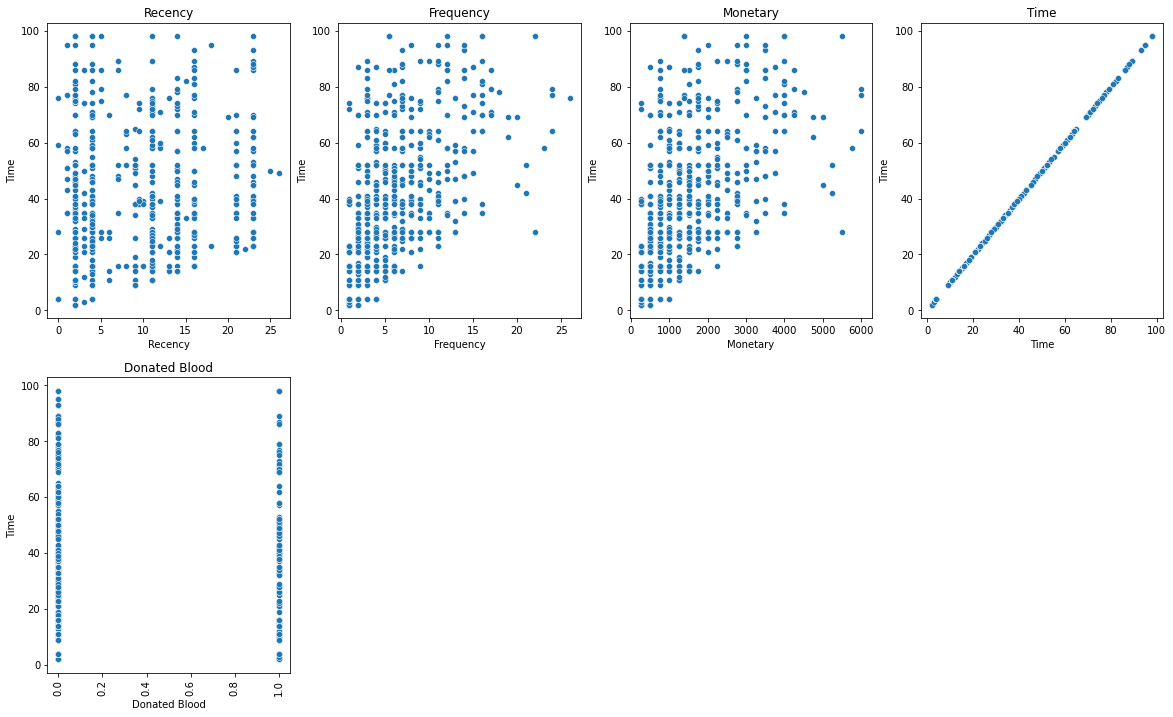

In [34]:
import seaborn as sns
plt.figure(figsize=(20,25))
for i, col in enumerate(fake_transfusion.columns):
    plt.subplot(4,4,i+1)
    sns.scatterplot(data=fake_transfusion, x=col, y='Time')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

# Multiple Relationship Donated blood in 2007 vs others

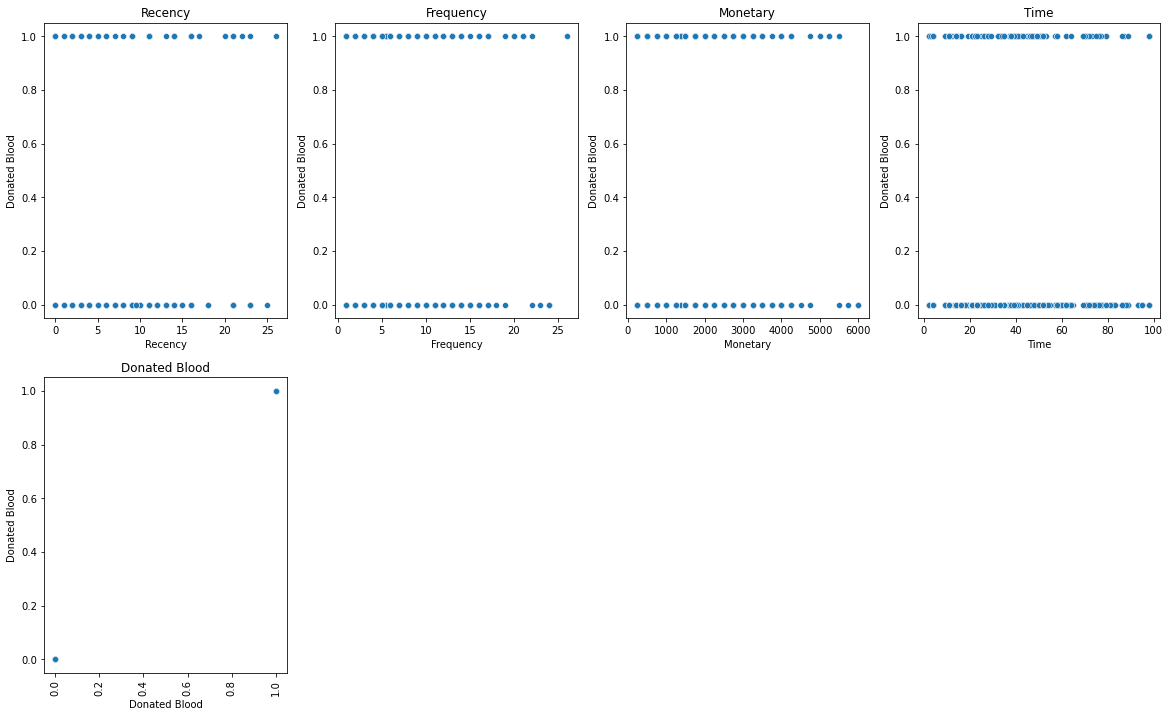

In [35]:
import seaborn as sns
plt.figure(figsize=(20,25))
for i, col in enumerate(fake_transfusion.columns):
    plt.subplot(4,4,i+1)
    sns.scatterplot(data=fake_transfusion, x=col, y='Donated Blood')
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

# Multiple Relationship

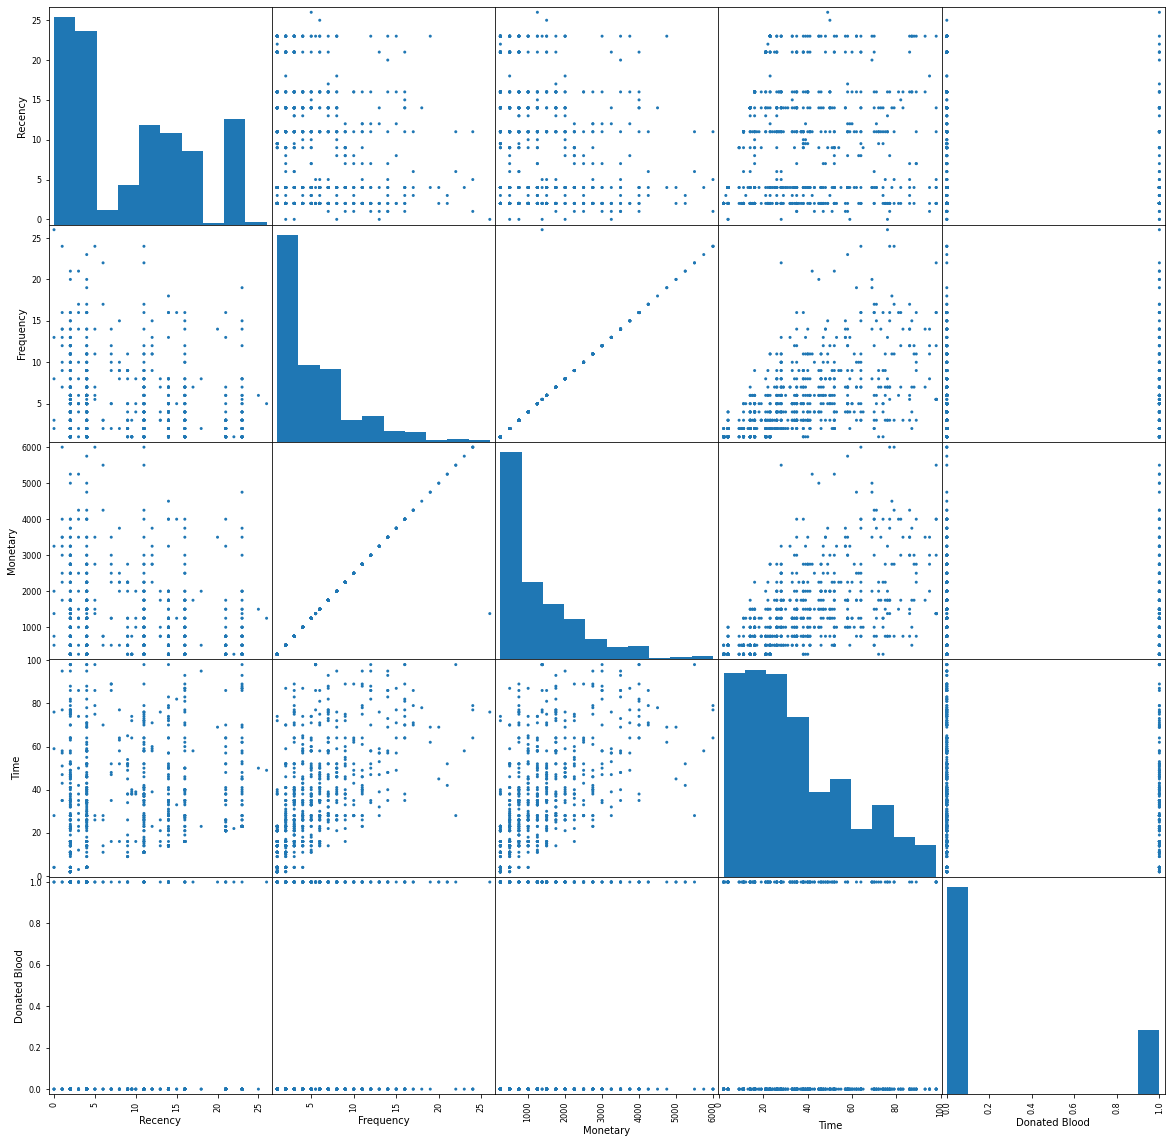

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(fake_transfusion,alpha=1,figsize=(20,20),diagonal='hist')
plt.show()

> This scatter matrix plot shows that there is a linear relationship between the time and monetary.

# Relationship between the frequency and time

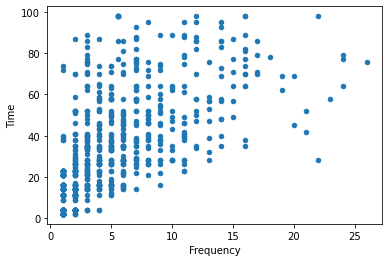

In [37]:
fake_transfusion.plot(kind='scatter',x='Frequency',y='Time')
plt.show()

# Relationship between the Monetary and time


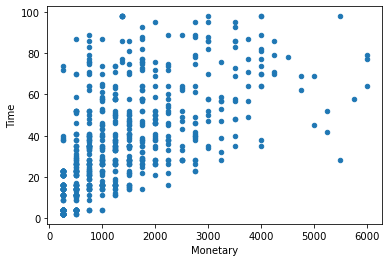

In [38]:
fake_transfusion.plot(kind='scatter',x='Monetary',y='Time')
plt.show()

# Relationship between Monetary and Recency

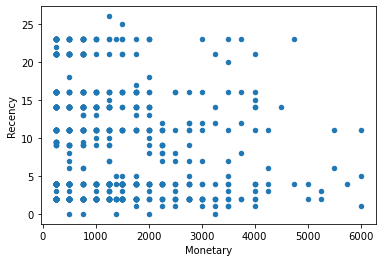

In [39]:

fake_transfusion.plot(kind='scatter',x='Monetary',y='Recency')
plt.show()

# Relationship between the frequency and Monetary

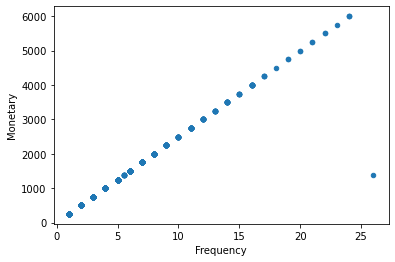

In [40]:

fake_transfusion.plot(kind='scatter',x='Frequency',y='Monetary')
plt.show()

> This plot clearly shows that the Highly linear relationship between the frequency and Monetary,

# Relationship between the frequency and Recency


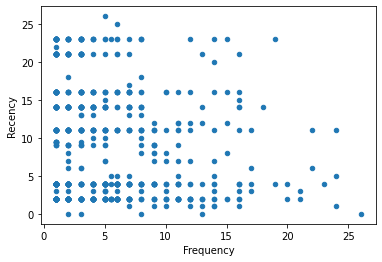

In [41]:

fake_transfusion.plot(kind='scatter',x='Frequency',y='Recency')
plt.show()

# Relationship between the Time and Recency



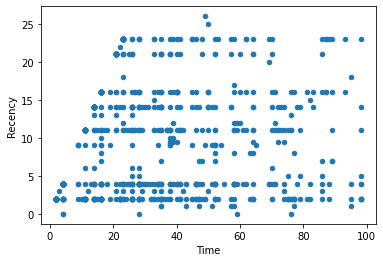

In [42]:

fake_transfusion.plot(kind='scatter',x='Time',y='Recency')
plt.show()

# Relationship between Donated Blood and Frequency

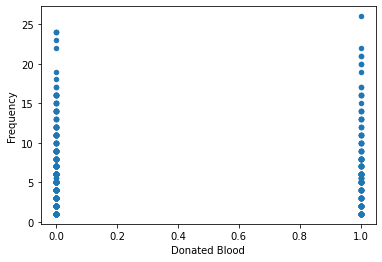

In [43]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Frequency')
plt.show()

# Relationship between Donated Blood and Recency

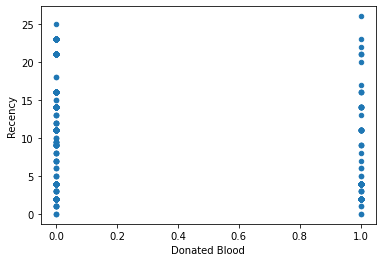

In [44]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Recency')
plt.show()

# Relationship between Donated Blood and Time

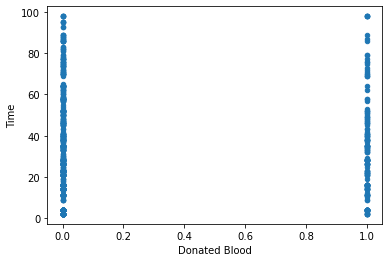

In [45]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Time')
plt.show()

# Relationship between Donated Blood and Monetary

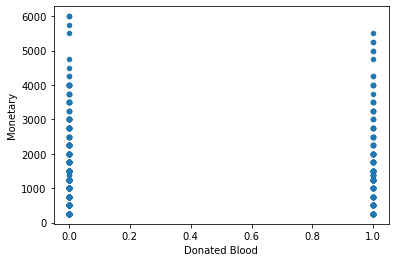

In [46]:
fake_transfusion.plot(kind='scatter',x='Donated Blood',y='Monetary')
plt.show()

In [47]:

#transfusion.to_csv('transfusion_test.csv', index=True)




In [48]:
# Relationship between Donated Blood and Recency